# Improving Employee Retention by Predicting Employee Attrition Using Machine Learning

Created By : Rafif Noor Audryan

# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Import Data

In [2]:
df = pd.read_excel('Improving Employee Retention.xlsx')

# Data Understanding

In [3]:
df.head()

Username  EnterpriseID StatusPernikahan JenisKelamin  \
0  spiritedPorpoise3        111065    Belum_menikah         Pria   
1    jealousGelding2        106080    Belum_menikah         Pria   
2      pluckyMuesli3        106452          Menikah         Pria   
3   stressedTruffle1        106325    Belum_menikah         Pria   
4        shyTermite7        111171    Belum_menikah       Wanita   

  StatusKepegawaian                      Pekerjaan           JenjangKarir  \
0         Outsource   Software Engineer (Back End)  Freshgraduate_program   
1          FullTime                   Data Analyst  Freshgraduate_program   
2          FullTime  Software Engineer (Front End)  Freshgraduate_program   
3         Outsource  Software Engineer (Front End)  Freshgraduate_program   
4          FullTime                Product Manager  Freshgraduate_program   

  PerformancePegawai     AsalDaerah     HiringPlatform  SkorSurveyEngagement  \
0       Sangat_bagus  Jakarta Timur  Employee_Referral                     4   
1      Sangat_kurang  Jakarta Utara            Website                     4   
2              Bagus  Jakarta Timur             Indeed                     4   
3              Bagus  Jakarta Pusat           LinkedIn                     3   
4              Bagus  Jakarta Timur           LinkedIn                     3   

   SkorKepuasanPegawai  JumlahKeikutsertaanProjek  \
0                  4.0                        0.0   
1                  4.0                        4.0   
2                  3.0                        0.0   
3                  3.0                        0.0   
4                  3.0                        0.0   

   JumlahKeterlambatanSebulanTerakhir  JumlahKetidakhadiran         NomorHP  \
0                                 0.0                   9.0  +6282232522xxx   
1                                 0.0                   3.0  +6281270745xxx   
2                                 0.0                  11.0  +6281346215xxx   
3                                 4.0                   6.0  +6283233846xxx   
4                                 0.0                  11.0  +6287883263xxx   

                             Email TingkatPendidikan PernahBekerja  \
0   spiritedPorpoise3135@yahoo.com          Magister             1   
1     jealousGelding2239@yahoo.com           Sarjana             1   
2      pluckyMuesli3961@icloud.com          Magister             1   
3  stressedTruffle1406@hotmail.com           Sarjana             1   
4         shyTermite7149@gmail.com           Sarjana             1   

   IkutProgramLOP   AlasanResign TanggalLahir TanggalHiring  \
0             1.0  masih_bekerja   1972-07-01    2011-01-10   
1             1.0  toxic_culture   1984-04-26    2014-01-06   
2             1.0      jam_kerja   1974-01-07    2011-01-10   
3             0.0  masih_bekerja   1979-11-24     2014-2-17   
4             0.0    ganti_karir   1974-11-07    2013-11-11   

  TanggalPenilaianKaryawan TanggalResign  
0                2016-2-15             -  
1                2020-1-17     2018-6-16  
2               2016-01-10     2014-9-24  
3               2020-02-04             -  
4                2020-1-22    2018-09-06

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

Fitur `JumlahKeterlambatanSebulanTerakhir`,`JumlahKetidakhadiran`,`IkutProgramLOP`,`AlasanResign` memiliki missing value

# Check Missing Value

In [5]:
df_clean = df.copy()

In [6]:
df_clean.isnull().sum().sort_values(ascending = False)

IkutProgramLOP                        258
AlasanResign                           66
JumlahKetidakhadiran                    6
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
TanggalPenilaianKaryawan                0
TanggalHiring                           0
TanggalLahir                            0
PernahBekerja                           0
TingkatPendidikan                       0
Email                                   0
NomorHP                                 0
Username                                0
EnterpriseID                            0
SkorSurveyEngagement                    0
HiringPlatform                          0
AsalDaerah                              0
PerformancePegawai                      0
JenjangKarir                            0
Pekerjaan                               0
StatusKepegawaian                       0
JenisKelamin                            0
StatusPernikahan                  

* Fitur IkutProgramLOP terlalu banyak nilai null dari keseluruhan data sehingga fitur ini tidak akan dipakai 
* Terlihat data yang memiliki nilai null pada fitur `AlasanResign` belum resign dari pekerjaan sehingga dapat digantikan dengan "masih_bekerja"
* Nilai null pada fitur `JumlahKetidakhadiran` dapat digantikan dengan nilai 0
* Nilai null pada fitur `JumlahKeikutsertaanProjek` dapat digantikan dengan nilai 0
* Nilai null pada fitur `JumlahKeterlambatanSebulanTerakhir` dapat digantikan dengan nilai 0
* Nilai null pada fitur `SkorKepuasanPegawai` dapat digantikan dengan nilai median

# Handle Missing Value

In [7]:
df_clean['AlasanResign'] = df_clean['AlasanResign'].fillna('masih_bekerja')
df_clean['JumlahKetidakhadiran'] = df_clean['JumlahKetidakhadiran'].fillna(0)
df_clean['JumlahKeikutsertaanProjek'] = df_clean['JumlahKeikutsertaanProjek'].fillna(0)
df_clean['JumlahKeterlambatanSebulanTerakhir'] = df_clean['JumlahKeterlambatanSebulanTerakhir'].fillna(0)
df_clean['SkorKepuasanPegawai'].fillna(df_clean['SkorKepuasanPegawai'].median(),inplace = True)
df_clean.drop(columns = ['IkutProgramLOP'], inplace = True)

In [8]:
df_clean['AlasanResign'].value_counts()

masih_bekerja               198
jam_kerja                    16
ganti_karir                  14
kejelasan_karir              11
tidak_bisa_remote            11
toxic_culture                10
leadership                    9
tidak_bahagia                 8
internal_conflict             4
Product Design (UI & UX)      4
apresiasi                     2
Name: AlasanResign, dtype: int64

In [9]:
df_clean.isnull().sum()

Username                              0
EnterpriseID                          0
StatusPernikahan                      0
JenisKelamin                          0
StatusKepegawaian                     0
Pekerjaan                             0
JenjangKarir                          0
PerformancePegawai                    0
AsalDaerah                            0
HiringPlatform                        0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
NomorHP                               0
Email                                 0
TingkatPendidikan                     0
PernahBekerja                         0
AlasanResign                          0
TanggalLahir                          0
TanggalHiring                         0
TanggalPenilaianKaryawan              0
TanggalResign                         0
dtype: int64

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 287 non-n

# Check Duplicate Data

In [11]:
df_clean.duplicated().sum()

0

In [12]:
df_clean['PernahBekerja'].value_counts()

1      286
yes      1
Name: PernahBekerja, dtype: int64

* Terdapat dua value yang berbeda input namun memiliki arti yang sama,jika yes digantikan menjadi "1" maka fitur hanya memiliki 1 unique value. Maka fitur `PernahBekerja` akan dibuang

In [13]:
df_clean.drop(columns = ['PernahBekerja'], inplace = True)

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 287 non-n

In [15]:
df_clean.describe().T

count           mean          std  \
EnterpriseID                        287.0  105923.324042  4044.977599   
SkorSurveyEngagement                287.0       3.101045     0.836388   
SkorKepuasanPegawai                 287.0       3.905923     0.905423   
JumlahKeikutsertaanProjek           287.0       1.167247     2.285537   
JumlahKeterlambatanSebulanTerakhir  287.0       0.411150     1.273018   
JumlahKetidakhadiran                287.0      10.229965     6.991709   

                                         min       25%       50%       75%  \
EnterpriseID                        100282.0  101269.0  106069.0  110514.5   
SkorSurveyEngagement                     1.0       3.0       3.0       4.0   
SkorKepuasanPegawai                      1.0       3.0       4.0       5.0   
JumlahKeikutsertaanProjek                0.0       0.0       0.0       0.0   
JumlahKeterlambatanSebulanTerakhir       0.0       0.0       0.0       0.0   
JumlahKetidakhadiran                     0.0       4.0      10.0      15.0   

                                         max  
EnterpriseID                        111703.0  
SkorSurveyEngagement                     5.0  
SkorKepuasanPegawai                      5.0  
JumlahKeikutsertaanProjek                8.0  
JumlahKeterlambatanSebulanTerakhir       6.0  
JumlahKetidakhadiran                    55.0

In [16]:
df_clean[df_clean.select_dtypes(include = 'object').columns.to_list()].describe().T

count unique                             top freq
Username                   287    285                      boredEggs0    2
StatusPernikahan           287      5                   Belum_menikah  132
JenisKelamin               287      2                          Wanita  167
StatusKepegawaian          287      3                        FullTime  217
Pekerjaan                  287     14    Software Engineer (Back End)  109
JenjangKarir               287      3           Freshgraduate_program  169
PerformancePegawai         287      5                           Biasa   85
AsalDaerah                 287      5                   Jakarta Pusat   72
HiringPlatform             287      9                          Indeed   85
NomorHP                    287    287                  +6282232522xxx    1
Email                      287    287  spiritedPorpoise3135@yahoo.com    1
TingkatPendidikan          287      3                         Sarjana  176
AlasanResign               287     11                   masih_bekerja  198
TanggalLahir               287    284                      1987-06-14    2
TanggalHiring              287     97                      2011-01-10   12
TanggalPenilaianKaryawan   287    127                       2020-1-14   17
TanggalResign              287     53                               -  198

In [17]:
df_clean['TanggalResign'].replace('-',0,inplace = True)

In [18]:
df_clean.head()

Username  EnterpriseID StatusPernikahan JenisKelamin  \
0  spiritedPorpoise3        111065    Belum_menikah         Pria   
1    jealousGelding2        106080    Belum_menikah         Pria   
2      pluckyMuesli3        106452          Menikah         Pria   
3   stressedTruffle1        106325    Belum_menikah         Pria   
4        shyTermite7        111171    Belum_menikah       Wanita   

  StatusKepegawaian                      Pekerjaan           JenjangKarir  \
0         Outsource   Software Engineer (Back End)  Freshgraduate_program   
1          FullTime                   Data Analyst  Freshgraduate_program   
2          FullTime  Software Engineer (Front End)  Freshgraduate_program   
3         Outsource  Software Engineer (Front End)  Freshgraduate_program   
4          FullTime                Product Manager  Freshgraduate_program   

  PerformancePegawai     AsalDaerah     HiringPlatform  SkorSurveyEngagement  \
0       Sangat_bagus  Jakarta Timur  Employee_Referral                     4   
1      Sangat_kurang  Jakarta Utara            Website                     4   
2              Bagus  Jakarta Timur             Indeed                     4   
3              Bagus  Jakarta Pusat           LinkedIn                     3   
4              Bagus  Jakarta Timur           LinkedIn                     3   

   SkorKepuasanPegawai  JumlahKeikutsertaanProjek  \
0                  4.0                        0.0   
1                  4.0                        4.0   
2                  3.0                        0.0   
3                  3.0                        0.0   
4                  3.0                        0.0   

   JumlahKeterlambatanSebulanTerakhir  JumlahKetidakhadiran         NomorHP  \
0                                 0.0                   9.0  +6282232522xxx   
1                                 0.0                   3.0  +6281270745xxx   
2                                 0.0                  11.0  +6281346215xxx   
3                                 4.0                   6.0  +6283233846xxx   
4                                 0.0                  11.0  +6287883263xxx   

                             Email TingkatPendidikan   AlasanResign  \
0   spiritedPorpoise3135@yahoo.com          Magister  masih_bekerja   
1     jealousGelding2239@yahoo.com           Sarjana  toxic_culture   
2      pluckyMuesli3961@icloud.com          Magister      jam_kerja   
3  stressedTruffle1406@hotmail.com           Sarjana  masih_bekerja   
4         shyTermite7149@gmail.com           Sarjana    ganti_karir   

  TanggalLahir TanggalHiring TanggalPenilaianKaryawan TanggalResign  
0   1972-07-01    2011-01-10                2016-2-15             0  
1   1984-04-26    2014-01-06                2020-1-17     2018-6-16  
2   1974-01-07    2011-01-10               2016-01-10     2014-9-24  
3   1979-11-24     2014-2-17               2020-02-04             0  
4   1974-11-07    2013-11-11                2020-1-22    2018-09-06

In [19]:
df_cleaned = df_clean.copy()

# EDA

In [20]:
df_eda = df_cleaned.copy()

In [21]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 287 non-n

In [22]:
df_eda.head()

Username  EnterpriseID StatusPernikahan JenisKelamin  \
0  spiritedPorpoise3        111065    Belum_menikah         Pria   
1    jealousGelding2        106080    Belum_menikah         Pria   
2      pluckyMuesli3        106452          Menikah         Pria   
3   stressedTruffle1        106325    Belum_menikah         Pria   
4        shyTermite7        111171    Belum_menikah       Wanita   

  StatusKepegawaian                      Pekerjaan           JenjangKarir  \
0         Outsource   Software Engineer (Back End)  Freshgraduate_program   
1          FullTime                   Data Analyst  Freshgraduate_program   
2          FullTime  Software Engineer (Front End)  Freshgraduate_program   
3         Outsource  Software Engineer (Front End)  Freshgraduate_program   
4          FullTime                Product Manager  Freshgraduate_program   

  PerformancePegawai     AsalDaerah     HiringPlatform  SkorSurveyEngagement  \
0       Sangat_bagus  Jakarta Timur  Employee_Referral                     4   
1      Sangat_kurang  Jakarta Utara            Website                     4   
2              Bagus  Jakarta Timur             Indeed                     4   
3              Bagus  Jakarta Pusat           LinkedIn                     3   
4              Bagus  Jakarta Timur           LinkedIn                     3   

   SkorKepuasanPegawai  JumlahKeikutsertaanProjek  \
0                  4.0                        0.0   
1                  4.0                        4.0   
2                  3.0                        0.0   
3                  3.0                        0.0   
4                  3.0                        0.0   

   JumlahKeterlambatanSebulanTerakhir  JumlahKetidakhadiran         NomorHP  \
0                                 0.0                   9.0  +6282232522xxx   
1                                 0.0                   3.0  +6281270745xxx   
2                                 0.0                  11.0  +6281346215xxx   
3                                 4.0                   6.0  +6283233846xxx   
4                                 0.0                  11.0  +6287883263xxx   

                             Email TingkatPendidikan   AlasanResign  \
0   spiritedPorpoise3135@yahoo.com          Magister  masih_bekerja   
1     jealousGelding2239@yahoo.com           Sarjana  toxic_culture   
2      pluckyMuesli3961@icloud.com          Magister      jam_kerja   
3  stressedTruffle1406@hotmail.com           Sarjana  masih_bekerja   
4         shyTermite7149@gmail.com           Sarjana    ganti_karir   

  TanggalLahir TanggalHiring TanggalPenilaianKaryawan TanggalResign  
0   1972-07-01    2011-01-10                2016-2-15             0  
1   1984-04-26    2014-01-06                2020-1-17     2018-6-16  
2   1974-01-07    2011-01-10               2016-01-10     2014-9-24  
3   1979-11-24     2014-2-17               2020-02-04             0  
4   1974-11-07    2013-11-11                2020-1-22    2018-09-06

#### Extract Tahun pada Kolom TanggalHiring dan TanggaResign

In [23]:
df_eda['tahun_hiring'] = df_eda['TanggalHiring'].astype('str').str.partition("-")[0]
df_eda['tahun_resign'] = df_eda['TanggalResign'].astype('str').str.partition("-")[0] 

In [24]:
df_eda.head()

Username  EnterpriseID StatusPernikahan JenisKelamin  \
0  spiritedPorpoise3        111065    Belum_menikah         Pria   
1    jealousGelding2        106080    Belum_menikah         Pria   
2      pluckyMuesli3        106452          Menikah         Pria   
3   stressedTruffle1        106325    Belum_menikah         Pria   
4        shyTermite7        111171    Belum_menikah       Wanita   

  StatusKepegawaian                      Pekerjaan           JenjangKarir  \
0         Outsource   Software Engineer (Back End)  Freshgraduate_program   
1          FullTime                   Data Analyst  Freshgraduate_program   
2          FullTime  Software Engineer (Front End)  Freshgraduate_program   
3         Outsource  Software Engineer (Front End)  Freshgraduate_program   
4          FullTime                Product Manager  Freshgraduate_program   

  PerformancePegawai     AsalDaerah     HiringPlatform  SkorSurveyEngagement  \
0       Sangat_bagus  Jakarta Timur  Employee_Referral                     4   
1      Sangat_kurang  Jakarta Utara            Website                     4   
2              Bagus  Jakarta Timur             Indeed                     4   
3              Bagus  Jakarta Pusat           LinkedIn                     3   
4              Bagus  Jakarta Timur           LinkedIn                     3   

   SkorKepuasanPegawai  JumlahKeikutsertaanProjek  \
0                  4.0                        0.0   
1                  4.0                        4.0   
2                  3.0                        0.0   
3                  3.0                        0.0   
4                  3.0                        0.0   

   JumlahKeterlambatanSebulanTerakhir  JumlahKetidakhadiran         NomorHP  \
0                                 0.0                   9.0  +6282232522xxx   
1                                 0.0                   3.0  +6281270745xxx   
2                                 0.0                  11.0  +6281346215xxx   
3                                 4.0                   6.0  +6283233846xxx   
4                                 0.0                  11.0  +6287883263xxx   

                             Email TingkatPendidikan   AlasanResign  \
0   spiritedPorpoise3135@yahoo.com          Magister  masih_bekerja   
1     jealousGelding2239@yahoo.com           Sarjana  toxic_culture   
2      pluckyMuesli3961@icloud.com          Magister      jam_kerja   
3  stressedTruffle1406@hotmail.com           Sarjana  masih_bekerja   
4         shyTermite7149@gmail.com           Sarjana    ganti_karir   

  TanggalLahir TanggalHiring TanggalPenilaianKaryawan TanggalResign  \
0   1972-07-01    2011-01-10                2016-2-15             0   
1   1984-04-26    2014-01-06                2020-1-17     2018-6-16   
2   1974-01-07    2011-01-10               2016-01-10     2014-9-24   
3   1979-11-24     2014-2-17               2020-02-04             0   
4   1974-11-07    2013-11-11                2020-1-22    2018-09-06   

  tahun_hiring tahun_resign  
0         2011            0  
1         2014         2018  
2         2011         2014  
3         2014            0  
4         2013         2018

Ubah tipe data `tahun_hiring` dan `tahun_resign` ke integer

In [25]:
df_eda['tahun_hiring'] = df_eda['tahun_hiring'].astype('int64')
df_eda['tahun_resign'] = df_eda['tahun_resign'].astype('int64')

In [26]:
df_gb1 = df_eda.groupby('tahun_hiring').agg(total_hiring =('Username','count')).reset_index()

In [27]:
df_gb2 = df_eda.groupby('tahun_resign').agg(total_resign =('Username','count')).reset_index()

In [28]:
df_gb_join = pd.merge(df_gb1, df_gb2, left_on='tahun_hiring', right_on='tahun_resign', how='outer')

In [29]:
df_gb_join = df_gb_join.fillna(0)

In [30]:
df_gb_join ['tahun_hiring'].mask(df_gb_join ['tahun_hiring'] == 0,df_gb_join ['tahun_resign'], inplace=True)
df_gb_join ['total_karyawan'] = df_gb_join ['total_hiring'].cumsum() - df_gb_join ['total_resign']
df_gb_join ['perubahan'] = df_gb_join ['total_hiring'] - df_gb_join ['total_resign']
df_gb_join.drop(df_gb_join [df_gb_join ['tahun_hiring'] == 0.0].index, inplace = True)
df_gb_join ['tahun_resign'] = df_gb_join ['tahun_resign'].astype('int64')
df_gb_join ['tahun_hiring'] = df_gb_join ['tahun_hiring'].astype('int64')
df_gb_join 

tahun_hiring  total_hiring  tahun_resign  total_resign  total_karyawan  \
0           2006           1.0             0           0.0             1.0   
1           2007           2.0             0           0.0             3.0   
2           2008           2.0             0           0.0             5.0   
3           2009           7.0             0           0.0            12.0   
4           2010           8.0             0           0.0            20.0   
5           2011          76.0             0           0.0            96.0   
6           2012          41.0             0           0.0           137.0   
7           2013          43.0          2013           5.0           175.0   
8           2014          56.0          2014          12.0           224.0   
9           2015          31.0          2015           8.0           259.0   
10          2016          14.0          2016           8.0           273.0   
11          2017           5.0          2017          19.0           267.0   
12          2018           1.0          2018          26.0           261.0   
14          2019           0.0          2019           5.0           282.0   
15          2020           0.0          2020           6.0           281.0   

    perubahan  
0         1.0  
1         2.0  
2         2.0  
3         7.0  
4         8.0  
5        76.0  
6        41.0  
7        38.0  
8        44.0  
9        23.0  
10        6.0  
11      -14.0  
12      -25.0  
14       -5.0  
15       -6.0

In [31]:
resign_2017 = df_eda[df_eda['tahun_resign']== 2017]
resign_2017['AlasanResign'].value_counts()

kejelasan_karir             3
toxic_culture               3
jam_kerja                   3
leadership                  3
internal_conflict           2
tidak_bisa_remote           2
Product Design (UI & UX)    1
apresiasi                   1
ganti_karir                 1
Name: AlasanResign, dtype: int64

In [32]:
resign_2018 = df_eda[df_eda['tahun_resign']== 2018]
resign_2018['AlasanResign'].value_counts()

jam_kerja                   6
kejelasan_karir             5
tidak_bahagia               4
ganti_karir                 3
toxic_culture               2
leadership                  2
tidak_bisa_remote           2
internal_conflict           1
Product Design (UI & UX)    1
Name: AlasanResign, dtype: int64

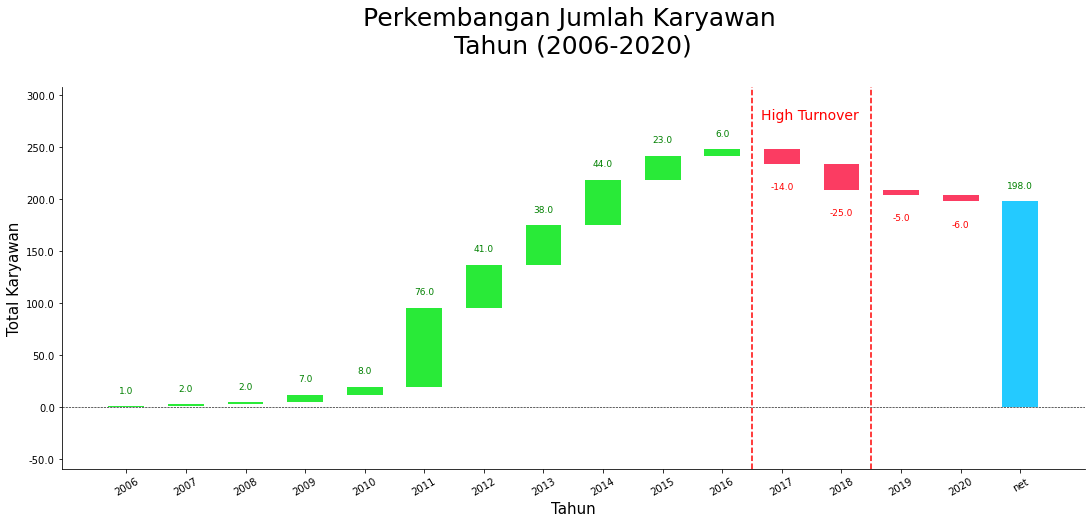

In [33]:
import waterfall_chart
plt.rcParams["figure.figsize"] = (15,6)

a = ['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
b = df_gb_join['perubahan']

waterfall_chart.plot(a ,b)

plt.axvline(10.5, ls='--', color='red')
plt.axvline(12.5, ls='--', color='red')
plt.text(x=10.65, y=280, s='High Turnover', fontsize=14, color='red', va='center')

plt.title('Perkembangan Jumlah Karyawan \nTahun (2006-2020)\n', fontsize=25)
plt.xticks(fontsize=10)
plt.xlabel('Tahun', fontsize=15)
plt.yticks(fontsize=10)
plt.ylabel('Total Karyawan', fontsize=15)
sns.despine()
plt.show()

* Tahun 2011-2016, terjadi peningkatan yang signifikan jumlah karyawan yang di hire,hal ini mengindikasikan pada tahun tersebut perusahaan sangat butuh banyak karyawan
* Tahun 2017 dan Tahun 2018 mulai adanya karyawan yang memutuskan untuk resign dengan jumlah yang lebih besar dibandingkan tahun sebelumnya sehingga total keseluruhan karyawan terus berkurang
* Total karyawan masih bekerja sampai pada tahun 2020 sebanyak 198
* Penyebab terbanyak mengapa karyawan memutuskan resign karena jam kerja dan kejelasan karir
* Perlu adanya inovasi seperti memberikan pelatihan untuk karyawan agar karir mereka dalam perusahaan terlihat jelas dan mendapatkan peningkatan skill yang bertahap serta mengkaji kembali jam kerja perusahaan

In [34]:
#Data frame karyawan yang telah resign
df_resign = df_eda[(df_eda['tahun_resign'] != 0)]
#Data frame karyawan yang masih bekerja
df_work= df_eda[(df_eda['tahun_resign'] == 0)]

In [35]:
df_gb3 = df_resign.groupby('Pekerjaan').agg(employee_resign =('Username','count')).reset_index()

In [36]:
df_gb4 = df_work.groupby('Pekerjaan').agg(employee_exist =('Username','count')).reset_index()

In [37]:
df_gb_join2 = pd.merge(df_gb3, df_gb4, on='Pekerjaan',how='outer')

In [38]:
df_gb_join2

Pekerjaan  employee_resign  employee_exist
0                     Data Analyst              8.0               8
1                    Data Engineer              3.0               7
2         Product Design (UI & UX)              9.0              15
3                  Product Manager              6.0              11
4      Software Engineer (Android)              7.0              17
5     Software Engineer (Back End)             28.0              81
6    Software Engineer (Front End)             28.0              44
7                  DevOps Engineer              NaN               3
8          Digital Product Manager              NaN               2
9        Machine Learning Engineer              NaN               2
10  Product Design (UX Researcher)              NaN               1
11                    Scrum Master              NaN               3
12              Software Architect              NaN               1
13         Software Engineer (iOS)              NaN               3

In [39]:
df_gb_join2 = df_gb_join2.fillna(0)
df_gb_join2['total_employee'] = df_gb_join2['employee_resign'] + df_gb_join2['employee_exist']
df_gb_join2['exist_percentage'] = round((df_gb_join2['employee_exist'] / df_gb_join2['total_employee']) *100,2)

In [40]:
df_gb_join2 = df_gb_join2.sort_values('exist_percentage',ascending = True) 
df_gb_join2

Pekerjaan  employee_resign  employee_exist  \
0                     Data Analyst              8.0               8   
6    Software Engineer (Front End)             28.0              44   
2         Product Design (UI & UX)              9.0              15   
3                  Product Manager              6.0              11   
1                    Data Engineer              3.0               7   
4      Software Engineer (Android)              7.0              17   
5     Software Engineer (Back End)             28.0              81   
7                  DevOps Engineer              0.0               3   
8          Digital Product Manager              0.0               2   
9        Machine Learning Engineer              0.0               2   
10  Product Design (UX Researcher)              0.0               1   
11                    Scrum Master              0.0               3   
12              Software Architect              0.0               1   
13         Software Engineer (iOS)              0.0               3   

    total_employee  exist_percentage  
0             16.0             50.00  
6             72.0             61.11  
2             24.0             62.50  
3             17.0             64.71  
1             10.0             70.00  
4             24.0             70.83  
5            109.0             74.31  
7              3.0            100.00  
8              2.0            100.00  
9              2.0            100.00  
10             1.0            100.00  
11             3.0            100.00  
12             1.0            100.00  
13             3.0            100.00

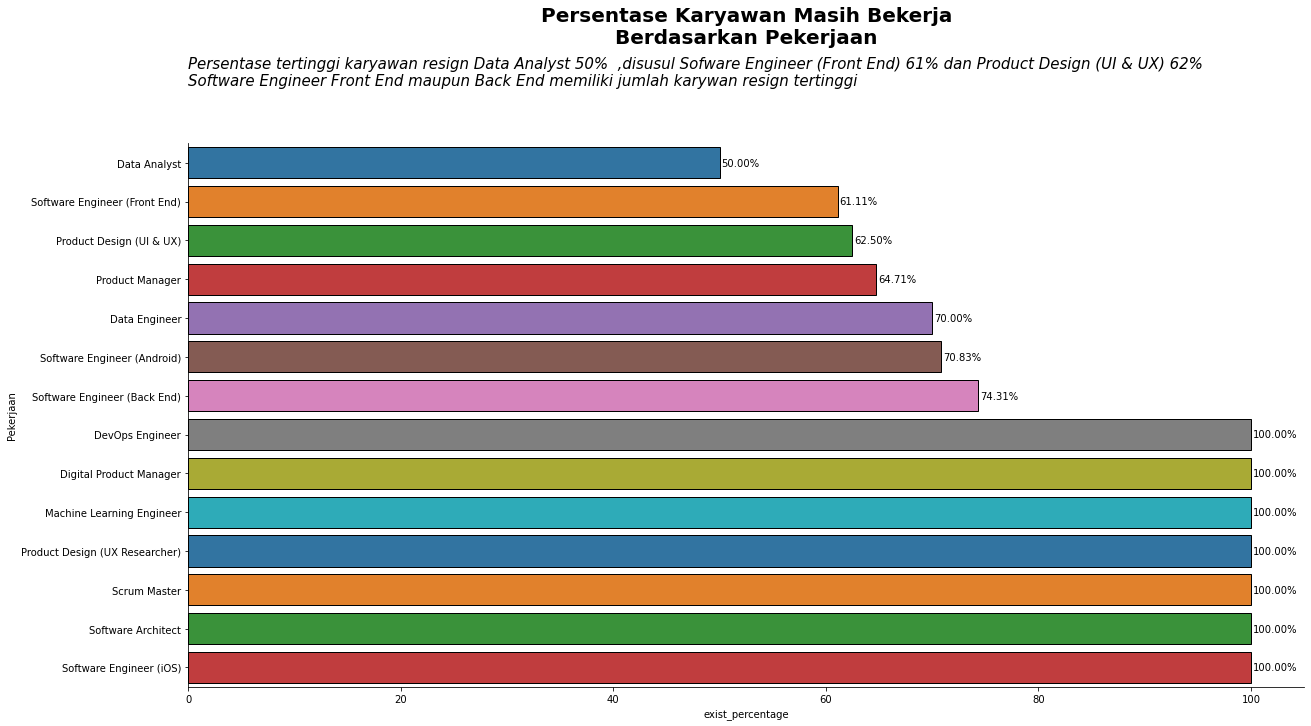

In [41]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.title("Persentase Karyawan Masih Bekerja\nBerdasarkan Pekerjaan", fontsize=20, color='black', weight='bold',pad = 100)
plt.text(x=0, y=-2, s="Persentase tertinggi karyawan resign Data Analyst 50%  ,disusul Sofware Engineer (Front End) 61% dan Product Design (UI & UX) 62%\nSoftware Engineer Front End maupun Back End memiliki jumlah karywan resign tertinggi ",
         fontsize=15, fontstyle='italic')
sns.barplot(y='Pekerjaan', x='exist_percentage', data=df_gb_join2, edgecolor='black',palette = 'tab10')
plt.bar_label(ax.containers[0], padding=2,fmt='%.2f%%')
sns.despine()

In [42]:
df_high_resign = df_eda[(df_eda['Pekerjaan'] == 'Data Analyst')]

In [43]:
df_high_resign =  df_high_resign[df_high_resign['tahun_resign'] !=0]
df_high_resign 

Username  EnterpriseID StatusPernikahan JenisKelamin  \
1     jealousGelding2        106080    Belum_menikah         Pria   
18    hushedSeahorse7        111202         Bercerai       Wanita   
86   sincereGatorade8        111089          Menikah       Wanita   
102       brainyFish3        111083          Menikah         Pria   
106  troubledThrushe9        101192                -       Wanita   
108    jealousIguana3        111209    Belum_menikah       Wanita   
233        jumpyBuck8        100317    Belum_menikah       Wanita   
239     finickySwift5        105296    Belum_menikah       Wanita   

    StatusKepegawaian     Pekerjaan           JenjangKarir PerformancePegawai  \
1            FullTime  Data Analyst  Freshgraduate_program      Sangat_kurang   
18           FullTime  Data Analyst  Freshgraduate_program       Sangat_bagus   
86          Outsource  Data Analyst  Freshgraduate_program       Sangat_bagus   
102         Outsource  Data Analyst  Freshgraduate_program       Sangat_bagus   
106          FullTime  Data Analyst  Freshgraduate_program              Bagus   
108          FullTime  Data Analyst  Freshgraduate_program              Biasa   
233          FullTime  Data Analyst  Freshgraduate_program       Sangat_bagus   
239         Outsource  Data Analyst  Freshgraduate_program              Biasa   

        AsalDaerah      HiringPlatform  SkorSurveyEngagement  \
1    Jakarta Utara             Website                     4   
18   Jakarta Pusat  Diversity_Job_Fair                     3   
86   Jakarta Timur              Indeed                     3   
102  Jakarta Barat       Google_Search                     3   
106  Jakarta Barat       CareerBuilder                     4   
108  Jakarta Timur       CareerBuilder                     4   
233  Jakarta Utara  Diversity_Job_Fair                     4   
239  Jakarta Utara       Google_Search                     4   

     SkorKepuasanPegawai  JumlahKeikutsertaanProjek  \
1                    4.0                        4.0   
18                   4.0                        0.0   
86                   5.0                        7.0   
102                  3.0                        0.0   
106                  3.0                        0.0   
108                  4.0                        0.0   
233                  3.0                        0.0   
239                  4.0                        0.0   

     JumlahKeterlambatanSebulanTerakhir  JumlahKetidakhadiran         NomorHP  \
1                                   0.0                   3.0  +6281270745xxx   
18                                  0.0                  17.0  +6281212698xxx   
86                                  0.0                   2.0  +6281225029xxx   
102                                 0.0                  20.0  +6285960968xxx   
106                                 0.0                  20.0  +6281801928xxx   
108                                 0.0                  10.0  +6283373813xxx   
233                                 0.0                   4.0  +6287731679xxx   
239                                 0.0                   2.0  +6281213075xxx   

                              Email TingkatPendidikan       AlasanResign  \
1      jealousGelding2239@yahoo.com           Sarjana      toxic_culture   
18    hushedSeahorse7404@icloud.com           Sarjana  internal_conflict   
86   sincereGatorade8842@icloud.com           Sarjana      toxic_culture   
102      brainyFish3571@hotmail.com           Sarjana      toxic_culture   
106  troubledThrushe9146@proton.com           Sarjana      toxic_culture   
108     jealousIguana3026@gmail.com           Sarjana      toxic_culture   
233       jumpyBuck8498@outlook.com          Magister      toxic_culture   
239     finickySwift5808@icloud.com          Magister  internal_conflict   

    TanggalLahir TanggalHiring TanggalPenilaianKaryawan TanggalResign  \
1     1984-04-26    2014-01-06                2020-1-17     2018-6-16   
18    1968-05-30    2012-04

In [44]:
df_gb3 = df_high_resign.groupby(['JenjangKarir','PerformancePegawai','AlasanResign']).agg(total_resign = ('Username','count')).reset_index()

In [45]:
df_gb3

JenjangKarir PerformancePegawai       AlasanResign  total_resign
0  Freshgraduate_program              Bagus      toxic_culture             1
1  Freshgraduate_program              Biasa  internal_conflict             1
2  Freshgraduate_program              Biasa      toxic_culture             1
3  Freshgraduate_program       Sangat_bagus  internal_conflict             1
4  Freshgraduate_program       Sangat_bagus      toxic_culture             3
5  Freshgraduate_program      Sangat_kurang      toxic_culture             1

In [46]:
import plotly.express as px

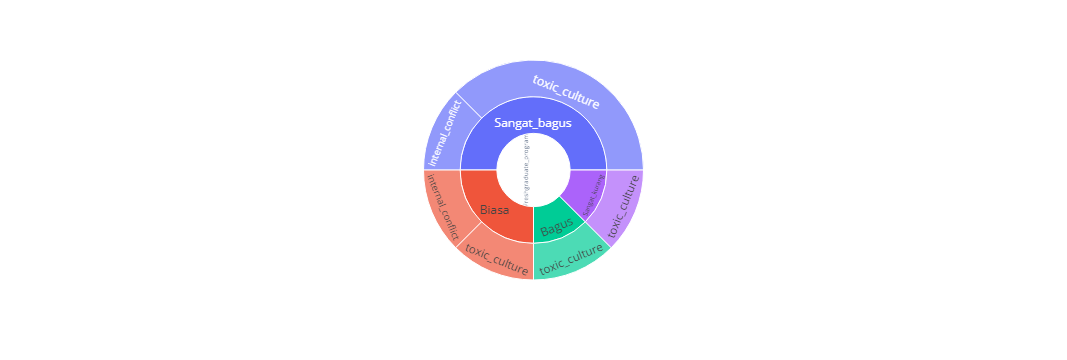

In [47]:
df3_plot = pd.DataFrame(
    dict(karir=df_gb3['JenjangKarir'], performa=df_gb3['PerformancePegawai'], alasan=df_gb3['AlasanResign'], total=df_gb3['total_resign'])
)
fig = px.sunburst(df3_plot, path=['karir', 'performa', 'alasan'], values='total')
fig.show()

* Karyawan dari divisi Data Analyst memiliki alasan resign cenderung sama yaitu karena toxic culture bagaimanapun performa mereka pada perusahaan
* Keseluruhan karyawan Data Analyst yang resign masih dalam level Freshgraduate
* Diduga adanya permasalahan internal divisi data analyst dari sisi atasan sehingga mempengaruhi pekerjaan yang menyebabkan toxic culture

In [48]:
df_high_resign2 = df_eda[(df_eda['Pekerjaan'] == 'Software Engineer (Front End)')]

In [49]:
df_high_resign2 =  df_high_resign2[df_high_resign2['tahun_resign'] !=0]
df_gb4 = df_high_resign2.groupby(['JenjangKarir','PerformancePegawai','AlasanResign']).agg(total_resign = ('Username','count')).reset_index()

In [50]:
df_gb4.sort_values('total_resign',ascending = False)

JenjangKarir PerformancePegawai              AlasanResign  \
6   Freshgraduate_program       Sangat_bagus         tidak_bisa_remote   
0   Freshgraduate_program              Bagus                 jam_kerja   
15              Mid_level       Sangat_bagus         tidak_bisa_remote   
13              Mid_level       Sangat_bagus           kejelasan_karir   
22           Senior_level       Sangat_bagus             toxic_culture   
21           Senior_level       Sangat_bagus           kejelasan_karir   
20           Senior_level             Kurang             toxic_culture   
19           Senior_level             Kurang                leadership   
18           Senior_level              Biasa                 jam_kerja   
17           Senior_level              Biasa               ganti_karir   
16           Senior_level              Biasa  Product Design (UI & UX)   
14              Mid_level       Sangat_bagus                leadership   
12              Mid_level             Kurang             tidak_bahagia   
1   Freshgraduate_program              Bagus         tidak_bisa_remote   
11              Mid_level             Kurang               ganti_karir   
10              Mid_level              Biasa         tidak_bisa_remote   
9               Mid_level              Biasa                 jam_kerja   
8               Mid_level              Bagus                leadership   
7   Freshgraduate_program      Sangat_kurang           kejelasan_karir   
5   Freshgraduate_program       Sangat_bagus  Product Design (UI & UX)   
4   Freshgraduate_program              Biasa         tidak_bisa_remote   
3   Freshgraduate_program              Biasa           kejelasan_karir   
2   Freshgraduate_program              Biasa                 apresiasi   
23           Senior_level      Sangat_kurang             toxic_culture   

    total_resign  
6              3  
0              2  
15             2  
13             1  
22             1  
21             1  
20             1  
19             1  
18             1  
17             1  
16             1  
14             1  
12             1  
1              1  
11             1  
10             1  
9              1  
8              1  
7              1  
5              1  
4              1  
3              1  
2              1  
23             1

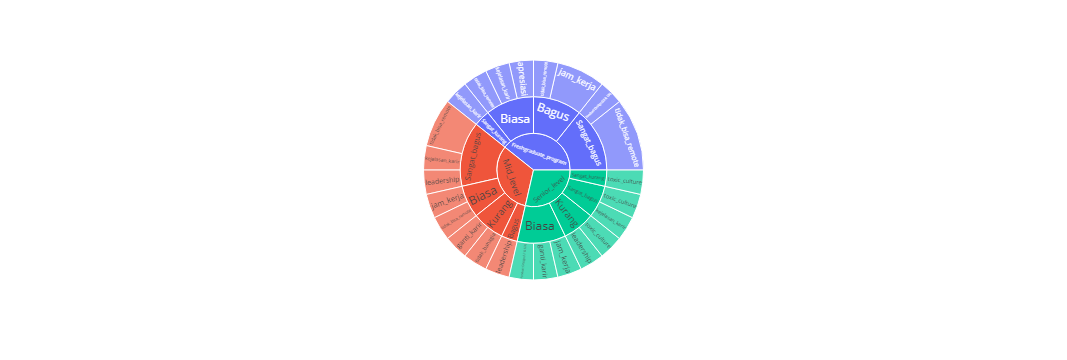

In [51]:
df4_plot = pd.DataFrame(
    dict(karir=df_gb4['JenjangKarir'], performa=df_gb4['PerformancePegawai'], alasan=df_gb4['AlasanResign'], total=df_gb4['total_resign'])
)
fig = px.sunburst(df4_plot, path=['karir', 'performa', 'alasan'], values='total')
fig.show()

* Karyawan dari divisi Software Engineer (Front End) memiliki alasan resign yang beragam namun mayoritas dari setiap level memiliki alasan karena jam kerja dan jenjang karir
* Mayoritas karyawan Software Engineer (Front End) yang resign masih dalam level Freshgraduate
* Jam kerja pada divisi Software Engineer (Front End) perlu dikaji kembali karena diduga adanya overwork pada karyawan 

## Pre-processing to Modeling

In [52]:
df_pre = df_eda.copy()

In [53]:
df_pre.head()

Username  EnterpriseID StatusPernikahan JenisKelamin  \
0  spiritedPorpoise3        111065    Belum_menikah         Pria   
1    jealousGelding2        106080    Belum_menikah         Pria   
2      pluckyMuesli3        106452          Menikah         Pria   
3   stressedTruffle1        106325    Belum_menikah         Pria   
4        shyTermite7        111171    Belum_menikah       Wanita   

  StatusKepegawaian                      Pekerjaan           JenjangKarir  \
0         Outsource   Software Engineer (Back End)  Freshgraduate_program   
1          FullTime                   Data Analyst  Freshgraduate_program   
2          FullTime  Software Engineer (Front End)  Freshgraduate_program   
3         Outsource  Software Engineer (Front End)  Freshgraduate_program   
4          FullTime                Product Manager  Freshgraduate_program   

  PerformancePegawai     AsalDaerah     HiringPlatform  SkorSurveyEngagement  \
0       Sangat_bagus  Jakarta Timur  Employee_Referral                     4   
1      Sangat_kurang  Jakarta Utara            Website                     4   
2              Bagus  Jakarta Timur             Indeed                     4   
3              Bagus  Jakarta Pusat           LinkedIn                     3   
4              Bagus  Jakarta Timur           LinkedIn                     3   

   SkorKepuasanPegawai  JumlahKeikutsertaanProjek  \
0                  4.0                        0.0   
1                  4.0                        4.0   
2                  3.0                        0.0   
3                  3.0                        0.0   
4                  3.0                        0.0   

   JumlahKeterlambatanSebulanTerakhir  JumlahKetidakhadiran         NomorHP  \
0                                 0.0                   9.0  +6282232522xxx   
1                                 0.0                   3.0  +6281270745xxx   
2                                 0.0                  11.0  +6281346215xxx   
3                                 4.0                   6.0  +6283233846xxx   
4                                 0.0                  11.0  +6287883263xxx   

                             Email TingkatPendidikan   AlasanResign  \
0   spiritedPorpoise3135@yahoo.com          Magister  masih_bekerja   
1     jealousGelding2239@yahoo.com           Sarjana  toxic_culture   
2      pluckyMuesli3961@icloud.com          Magister      jam_kerja   
3  stressedTruffle1406@hotmail.com           Sarjana  masih_bekerja   
4         shyTermite7149@gmail.com           Sarjana    ganti_karir   

  TanggalLahir TanggalHiring TanggalPenilaianKaryawan TanggalResign  \
0   1972-07-01    2011-01-10                2016-2-15             0   
1   1984-04-26    2014-01-06                2020-1-17     2018-6-16   
2   1974-01-07    2011-01-10               2016-01-10     2014-9-24   
3   1979-11-24     2014-2-17               2020-02-04             0   
4   1974-11-07    2013-11-11                2020-1-22    2018-09-06   

   tahun_hiring  tahun_resign  
0          2011             0  
1          2014          2018  
2          2011          2014  
3          2014             0  
4          2013          2018

## Feature Engineering

Membuat Fitur `is_resign` dimana jika karyawan telah resign maka akan dilabel 1,jika Karyawan masih bekerja maka akan dilabel 0

In [54]:
df_pre['is_resign'] = np.where(df_pre['tahun_resign'] != 0, 1, 0).astype('int64')

In [55]:
#Membuat Fitur Umur
df_pre['tahun_lahir'] = df_pre['TanggalLahir'].astype('str').str.partition("-")[0]
df_pre['tahun_lahir'] = df_pre['tahun_lahir'].astype('int64')
df_pre['umur'] = 2020 - df_pre['tahun_lahir']

In [56]:
# lama bekerja
def time_work(x,y):
    if y == 0:
        return 2020 - x
    return  y - x


In [57]:
# Membuat Fitur Lama Bekerja dalam Tahun
df_pre['lama_bekerja'] = df_pre.apply(lambda x: time_work(x['tahun_hiring'],x['tahun_resign']), axis = 1)

In [58]:
df_pre[df_pre['lama_bekerja'] < 0]

Username  EnterpriseID StatusPernikahan JenisKelamin  \
108   jealousIguana3        111209    Belum_menikah       Wanita   
207  troubledQuiche5        106480          Menikah       Wanita   

    StatusKepegawaian                      Pekerjaan           JenjangKarir  \
108          FullTime                   Data Analyst  Freshgraduate_program   
207          FullTime  Software Engineer (Front End)              Mid_level   

    PerformancePegawai     AsalDaerah HiringPlatform  SkorSurveyEngagement  \
108              Biasa  Jakarta Timur  CareerBuilder                     4   
207       Sangat_bagus  Jakarta Pusat         Indeed                     4   

     SkorKepuasanPegawai  JumlahKeikutsertaanProjek  \
108                  4.0                        0.0   
207                  3.0                        5.0   

     JumlahKeterlambatanSebulanTerakhir  JumlahKetidakhadiran         NomorHP  \
108                                 0.0                  10.0  +6283373813xxx   
207                                 0.0                  17.0  +6285896075xxx   

                             Email TingkatPendidikan   AlasanResign  \
108    jealousIguana3026@gmail.com           Sarjana  toxic_culture   
207  troubledQuiche5924@icloud.com           Sarjana     leadership   

    TanggalLahir TanggalHiring TanggalPenilaianKaryawan TanggalResign  \
108   1976-09-22     2015-3-30                2020-1-21     2014-8-19   
207   1972-11-21    2017-01-07               2020-02-06     2013-5-30   

     tahun_hiring  tahun_resign  is_resign  tahun_lahir  umur  lama_bekerja  
108          2015          2014          1         1976    44            -1  
207          2017          2013          1         1972    48            -4

In [59]:
df_pre[df_pre['AlasanResign'] == 'Product Design (UI & UX)']

Username  EnterpriseID StatusPernikahan JenisKelamin  \
27     pluckyApples4        110566          Menikah       Wanita   
124      dearKitten3        111266    Belum_menikah         Pria   
147     brainyLlama9        100884          Menikah       Wanita   
203  hushedBobolink8        106392          Menikah       Wanita   

    StatusKepegawaian                      Pekerjaan           JenjangKarir  \
27           FullTime  Software Engineer (Front End)           Senior_level   
124          FullTime       Product Design (UI & UX)  Freshgraduate_program   
147          FullTime  Software Engineer (Front End)  Freshgraduate_program   
203          FullTime   Software Engineer (Back End)              Mid_level   

    PerformancePegawai       AsalDaerah      HiringPlatform  \
27               Biasa  Jakarta Selatan            LinkedIn   
124       Sangat_bagus    Jakarta Utara  Diversity_Job_Fair   
147       Sangat_bagus    Jakarta Timur            LinkedIn   
203       Sangat_bagus  Jakarta Selatan             Website   

     SkorSurveyEngagement  SkorKepuasanPegawai  JumlahKeikutsertaanProjek  \
27                      3                  5.0                        0.0   
124                     3                  3.0                        0.0   
147                     3                  5.0                        0.0   
203                     3                  5.0                        0.0   

     JumlahKeterlambatanSebulanTerakhir  JumlahKetidakhadiran         NomorHP  \
27                                  0.0                  15.0  +6281988935xxx   
124                                 0.0                  19.0  +6289679074xxx   
147                                 0.0                  20.0  +6285503547xxx   
203                                 0.0                   9.0  +6285522082xxx   

                              Email TingkatPendidikan  \
27      pluckyApples4880@icloud.com           Sarjana   
124        dearKitten3235@yahoo.com           Sarjana   
147       brainyLlama9557@gmail.com           Sarjana   
203  hushedBobolink8263@outlook.com           Sarjana   

                 AlasanResign TanggalLahir TanggalHiring  \
27   Product Design (UI & UX)   1987-04-10    2016-07-06   
124  Product Design (UI & UX)   1989-05-02     2011-9-26   
147  Product Design (UI & UX)   1969-02-09    2012-03-07   
203  Product Design (UI & UX)   1988-08-29    2012-01-09   

    TanggalPenilaianKaryawan TanggalResign  tahun_hiring  tahun_resign  \
27                 2020-1-28    2016-08-07          2016          2016   
124               2014-03-02    2017-12-15          2011          2017   
147               2014-02-01     2016-4-24          2012          2016   
203               2020-02-01    2018-04-01          2012          2018   

     is_resign  tahun_lahir  umur  lama_bekerja  
27           1         1987    33             0  
124          1         1989    31             6  
147          1         1969    51             4  
203          1         1988    32             6

* Terdapat baris yang berisikan tanggal resign lebih dahulu dibandingkan tanggal hiring (2014 < 2015) sehingga diduga adanya kesalahan input pada dua baris data ini.Maka akan dihapus karena sebagai outlier
* Terdapat Baris yang berisikian `AlasanResign` Product Design (UI & UX) dimana pekerjaan mereka Software Engineer,maka baris ini akan dihapus karena diduga adanya kesalahan input dan hanya menyebabkan bias pada model

In [60]:
df_pre = df_pre.drop(df_pre[df_pre['lama_bekerja'] < 0].index)

In [61]:
df_pre = df_pre.drop(df_pre[df_pre['AlasanResign'] == 'Product Design (UI & UX)'].index)

In [62]:
df_pre.describe().T

count           mean          std  \
EnterpriseID                        281.0  105883.263345  4042.221378   
SkorSurveyEngagement                281.0       3.096085     0.841779   
SkorKepuasanPegawai                 281.0       3.900356     0.904769   
JumlahKeikutsertaanProjek           281.0       1.174377     2.293201   
JumlahKeterlambatanSebulanTerakhir  281.0       0.419929     1.285146   
JumlahKetidakhadiran                281.0      10.128114     7.003924   
tahun_hiring                        281.0    2012.665480     1.931464   
tahun_resign                        281.0     595.704626   921.719841   
is_resign                           281.0       0.295374     0.457024   
tahun_lahir                         281.0    1978.576512     8.831074   
umur                                281.0      41.423488     8.831074   
lama_bekerja                        281.0       6.384342     2.579099   

                                         min       25%       50%       75%  \
EnterpriseID                        100282.0  101264.0  106029.0  110500.0   
SkorSurveyEngagement                     1.0       3.0       3.0       4.0   
SkorKepuasanPegawai                      1.0       3.0       4.0       5.0   
JumlahKeikutsertaanProjek                0.0       0.0       0.0       0.0   
JumlahKeterlambatanSebulanTerakhir       0.0       0.0       0.0       0.0   
JumlahKetidakhadiran                     0.0       4.0      10.0      15.0   
tahun_hiring                          2006.0    2011.0    2013.0    2014.0   
tahun_resign                             0.0       0.0       0.0    2014.0   
is_resign                                0.0       0.0       0.0       1.0   
tahun_lahir                           1951.0    1973.0    1980.0    1986.0   
umur                                    28.0      34.0      40.0      47.0   
lama_bekerja                             0.0       5.0       7.0       8.0   

                                         max  
EnterpriseID                        111703.0  
SkorSurveyEngagement                     5.0  
SkorKepuasanPegawai                      5.0  
JumlahKeikutsertaanProjek                8.0  
JumlahKeterlambatanSebulanTerakhir       6.0  
JumlahKetidakhadiran                    55.0  
tahun_hiring                          2018.0  
tahun_resign                          2020.0  
is_resign                                1.0  
tahun_lahir                           1992.0  
umur                                    69.0  
lama_bekerja                            14.0

Selanjutnya Drop `EnterpriseID`,`Username`,`nomorhp`,`email`,`tanggallahir`,`tanggalhiring`,`tanggalpenilaiankaryawan` untuk tahap modeling karena fitur tersebut tidak diperlukan

In [63]:
df_pre.drop(columns = ['EnterpriseID','Username','NomorHP','Email','TanggalLahir','TanggalHiring',
                      'TanggalPenilaianKaryawan','TanggalResign','tahun_hiring','tahun_resign','tahun_lahir'], inplace = True)

In [64]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 0 to 286
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   StatusPernikahan                    281 non-null    object 
 1   JenisKelamin                        281 non-null    object 
 2   StatusKepegawaian                   281 non-null    object 
 3   Pekerjaan                           281 non-null    object 
 4   JenjangKarir                        281 non-null    object 
 5   PerformancePegawai                  281 non-null    object 
 6   AsalDaerah                          281 non-null    object 
 7   HiringPlatform                      281 non-null    object 
 8   SkorSurveyEngagement                281 non-null    int64  
 9   SkorKepuasanPegawai                 281 non-null    float64
 10  JumlahKeikutsertaanProjek           281 non-null    float64
 11  JumlahKeterlambatanSebulanTerakhir  281 non-n

In [65]:
cat = df_pre.select_dtypes(include = 'object').columns.to_list()
num = df_pre.select_dtypes(exclude = 'object').columns.to_list()

## Fitur Numerik

<AxesSubplot:>

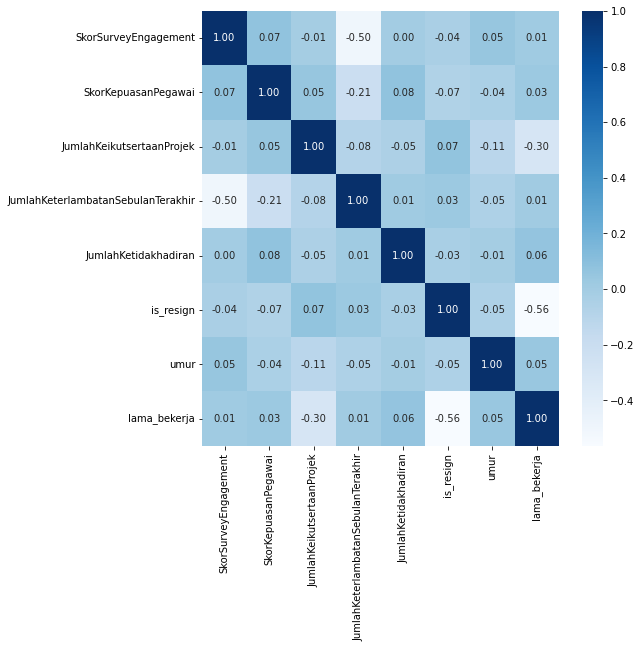

In [66]:
# correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(df_pre.corr(), cmap='Blues', annot=True, fmt='.2f')

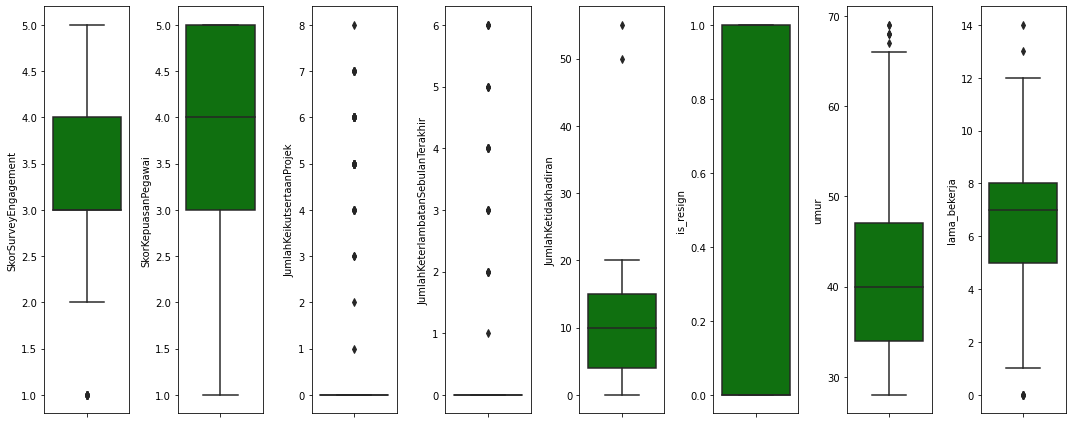

In [67]:
# Cek data Outlier
features = num
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_pre[features[i]], color='green', orient='v')
    plt.tight_layout()

In [68]:
df_pre[df_pre['JumlahKetidakhadiran']>20]

StatusPernikahan JenisKelamin StatusKepegawaian  \
12           Menikah         Pria          FullTime   
115          Lainnya       Wanita          FullTime   

                         Pekerjaan           JenjangKarir PerformancePegawai  \
12    Software Engineer (Back End)  Freshgraduate_program              Biasa   
115  Software Engineer (Front End)              Mid_level              Biasa   

        AsalDaerah HiringPlatform  SkorSurveyEngagement  SkorKepuasanPegawai  \
12   Jakarta Pusat       LinkedIn                     4                  3.0   
115  Jakarta Pusat  Google_Search                     4                  5.0   

     JumlahKeikutsertaanProjek  JumlahKeterlambatanSebulanTerakhir  \
12                         0.0                                 0.0   
115                        0.0                                 0.0   

     JumlahKetidakhadiran TingkatPendidikan   AlasanResign  is_resign  umur  \
12                   50.0          Magister  masih_bekerja          0    32   
115                  55.0           Sarjana  masih_bekerja          0    47   

     lama_bekerja  
12              7  
115             9

* Terdapat Outlier pada fitur `JumlahKetidakhadiran` dimana banyak jumlahketidakhadiran lebih dari 50 dan status karyawan tersebut telah resign.Kemungkinan adanya kesalahan absensi sehingga baris ini akan dibuang

In [69]:
df_pre = df_pre.drop(df_pre[df_pre['JumlahKetidakhadiran']>20].index)

In [70]:
df_pre[num].describe().T

count       mean       std   min   25%  \
SkorSurveyEngagement                279.0   3.089606  0.841290   1.0   3.0   
SkorKepuasanPegawai                 279.0   3.899642  0.904008   1.0   3.0   
JumlahKeikutsertaanProjek           279.0   1.182796  2.299263   0.0   0.0   
JumlahKeterlambatanSebulanTerakhir  279.0   0.422939  1.289266   0.0   0.0   
JumlahKetidakhadiran                279.0   9.824373  6.029423   0.0   4.0   
is_resign                           279.0   0.297491  0.457976   0.0   0.0   
umur                                279.0  41.437276  8.838408  28.0  34.0   
lama_bekerja                        279.0   6.372760  2.583312   0.0   5.0   

                                     50%   75%   max  
SkorSurveyEngagement                 3.0   4.0   5.0  
SkorKepuasanPegawai                  4.0   5.0   5.0  
JumlahKeikutsertaanProjek            0.0   0.0   8.0  
JumlahKeterlambatanSebulanTerakhir   0.0   0.0   6.0  
JumlahKetidakhadiran                10.0  15.0  20.0  
is_resign                            0.0   1.0   1.0  
umur                                40.0  46.5  69.0  
lama_bekerja                         6.0   8.0  14.0

## Fitur Kategorik

In [71]:
for col in cat:
    print(f'value counts of column {col}')
    print(df_pre[col].value_counts())
    print('---'*10, '\n')

value counts of column StatusPernikahan
Belum_menikah    130
Menikah           52
Bercerai          47
Lainnya           47
-                  3
Name: StatusPernikahan, dtype: int64
------------------------------ 

value counts of column JenisKelamin
Wanita    161
Pria      118
Name: JenisKelamin, dtype: int64
------------------------------ 

value counts of column StatusKepegawaian
FullTime      209
Outsource      66
Internship      4
Name: StatusKepegawaian, dtype: int64
------------------------------ 

value counts of column Pekerjaan
Software Engineer (Back End)      107
Software Engineer (Front End)      68
Software Engineer (Android)        24
Product Design (UI & UX)           23
Product Manager                    17
Data Analyst                       15
Data Engineer                      10
Scrum Master                        3
Software Engineer (iOS)             3
DevOps Engineer                     3
Digital Product Manager             2
Machine Learning Engineer           2


* Fitur StatusPernikahan, AsalDaerah dan JenisKelamin diputuskan untuk tidak digunakan karena kita ingin membuat model yang tidak diskriminatif
* Fitur StatusKepegawaian akan dilakukan label encoding dengan urutan internship : 0,outsource : 1,Fulltime : 2
* Fitur Pekerjaan akan dilakukan One Hot Encoding
* Fitur JenjangKarir akan dilakukan label encoding dengan urutan freshgrad : 0,mid_level : 1,senior_level : 2
* Fitur PerformancePegawai akan dilakukan label encoding dengan urutan sangat_kurang : 0,kurang : 1,biasa : 2,bagus : 3,sangat_bagus : 4
* Fitur HiringPlatform dilakukan penyesuaian label dengan membuat group baru (Indeed,linkedin,Websearch,Other) kemudian dilakukan One Hot Encoding
* Fitur TingkatPendidikan akan dilakukan label encoding dengan urutan sarjana : 0,magister : 1,doktor : 2
* Fitur AlasanResign dilakukan penyesuaian label dengan membuat group baru (masih_bekerja,masalah_karir,masalah_culture) 

In [72]:
df_pre.drop(columns = ['StatusPernikahan','AsalDaerah','JenisKelamin'],inplace = True)

In [73]:
cat = df_pre.select_dtypes(include = 'object').columns.to_list()

## Feature Encoding

In [74]:
df_encode = df_pre.copy()

In [75]:
# Label Encoder

#StatusKepegawaian
map_statuskepegawaian = {
    'Internship': 0,
    'Outsource' : 1,
    'FullTime' : 2
}
df_encode['kepegawaiaan_mapped'] = df_encode['StatusKepegawaian'].map(map_statuskepegawaian)

#JenjangKarir
map_jenjangkarir = {
    'Freshgraduate_program': 0,
    'Mid_level' : 1,
    'Senior_level' : 2
}
df_encode['jenjangkarir_mapped'] = df_encode['JenjangKarir'].map(map_jenjangkarir)

#PerformancePegawai
map_performancepegawai = {
    'Sangat_kurang': 0,
    'Kurang' : 1,
    'Biasa' : 2,
    'Bagus': 3,
    'Sangat_bagus': 4
}
df_encode['performancepegawai_mapped'] = df_encode['PerformancePegawai'].map(map_performancepegawai)

#JenjangKarir
map_tingkatpendidikan = {
    'Sarjana': 0,
    'Magister' : 1,
    'Doktor' : 2
}
df_encode['tingkatpendidikan_mapped'] = df_encode['TingkatPendidikan'].map(map_tingkatpendidikan)

In [76]:
df_encode.drop(columns = ['StatusKepegawaian','JenjangKarir','PerformancePegawai','TingkatPendidikan'],inplace = True)

In [77]:
# Adjust Label

#HiringPlatform
dict_hiringplatform = {
    'Indeed': 'Indeed',
    'LinkedIn' : 'LinkedIn',
    'Google_Search' : 'WebSearch',
    'Diversity_Job_Fair' : 'Other',
    'Employee_Referral': 'Other',
    'CareerBuilder': 'Other',
    'Website': 'WebSearch',
    'Other': 'Other',
    'On-line_Web_application' :'Other'     
}
df_encode['hiring_platform_group'] = df_encode['HiringPlatform'].map(dict_hiringplatform)


In [78]:
df_encode.drop(columns = ['HiringPlatform'],inplace = True)

In [79]:
df_encode

Pekerjaan  SkorSurveyEngagement  SkorKepuasanPegawai  \
0     Software Engineer (Back End)                     4                  4.0   
1                     Data Analyst                     4                  4.0   
2    Software Engineer (Front End)                     4                  3.0   
3    Software Engineer (Front End)                     3                  3.0   
4                  Product Manager                     3                  3.0   
..                             ...                   ...                  ...   
282                  Data Engineer                     2                  5.0   
283       Product Design (UI & UX)                     4                  5.0   
284  Software Engineer (Front End)                     2                  5.0   
285    Software Engineer (Android)                     4                  5.0   
286                   Data Analyst                     4                  3.0   

     JumlahKeikutsertaanProjek  JumlahKeterlambatanSebulanTerakhir  \
0                          0.0                                 0.0   
1                          4.0                                 0.0   
2                          0.0                                 0.0   
3                          0.0                                 4.0   
4                          0.0                                 0.0   
..                         ...                                 ...   
282                        0.0                                 0.0   
283                        0.0                                 0.0   
284                        0.0                                 0.0   
285                        0.0                                 0.0   
286                        0.0                                 0.0   

     JumlahKetidakhadiran     AlasanResign  is_resign  umur  lama_bekerja  \
0                     9.0    masih_bekerja          0    48             9   
1                     3.0    toxic_culture          1    36             4   
2                    11.0        jam_kerja          1    46             3   
3                     6.0    masih_bekerja          0    41             6   
4                    11.0      ganti_karir          1    46             5   
..                    ...              ...        ...   ...           ...   
282                  16.0    masih_bekerja          0    47             9   
283                  11.0        jam_kerja          1    46             4   
284                  17.0      ganti_karir          1    51             5   
285                  20.0  kejelasan_karir          1    39             7   
286                   2.0    masih_bekerja          0    39             8   

     kepegawaiaan_mapped  jenjangkarir_mapped  performancepegawai_mapped  \
0                      1                    0                          4   
1                      2                    0                          0   
2                      2                    0                          3   
3                      1                    0                          3   
4                      2                    0                          3   
..                   ...                  ...                        ...   
282                    2                    1                          3   
283                    2                    0                          2   
284                    2                    2                          2   
285                    2                    1                          3   
286                    0                    1                          3   

     tingkatpendidikan_mapped hiring_platform_group  
0                           1                 Other  
1                           0             WebSearch  
2                           1                Indeed  
3                           0              LinkedIn  
4                           0              LinkedIn  
..                        ...                   .

In [80]:
# Onehot encoder
# Feature encode tipe kategorical,
for cat in [['Pekerjaan','AlasanResign','hiring_platform_group']]:
    onehots = pd.get_dummies(df_encode[cat], prefix=cat)

In [81]:
onehots

Pekerjaan_Data Analyst  Pekerjaan_Data Engineer  \
0                         0                        0   
1                         1                        0   
2                         0                        0   
3                         0                        0   
4                         0                        0   
..                      ...                      ...   
282                       0                        1   
283                       0                        0   
284                       0                        0   
285                       0                        0   
286                       1                        0   

     Pekerjaan_DevOps Engineer  Pekerjaan_Digital Product Manager  \
0                            0                                  0   
1                            0                                  0   
2                            0                                  0   
3                            0                                  0   
4                            0                                  0   
..                         ...                                ...   
282                          0                                  0   
283                          0                                  0   
284                          0                                  0   
285                          0                                  0   
286                          0                                  0   

     Pekerjaan_Machine Learning Engineer  Pekerjaan_Product Design (UI & UX)  \
0                                      0                                   0   
1                                      0                                   0   
2                                      0                                   0   
3                                      0                                   0   
4                                      0                                   0   
..                                   ...                                 ...   
282                                    0                                   0   
283                                    0                                   1   
284                                    0                                   0   
285                                    0                                   0   
286                                    0                                   0   

     Pekerjaan_Product Design (UX Researcher)  Pekerjaan_Product Manager  \
0                                           0                          0   
1                                           0                          0   
2                                           0                          0   
3                                           0                          0   
4                                           0                          1   
..                                        ...                        ...   
282                                         0                          0   
283                                         0                          0   
284                                         0                          0   
285                                         0                          0   
286                                         0                          0   

     Pekerjaan_Scrum Master  Pekerjaan_Software Architect  \
0                         0                             0   
1                         0                             0   
2                         0                             0   
3                         0                             0   
4                         0                             0   
..                      ...                           ...   
282                       0                             0   
283                       0                             0   
284                       0                             0   
285                

In [82]:
df_encode= df_encode.join(onehots)

In [83]:
df_encode.drop(columns = ['Pekerjaan','AlasanResign','hiring_platform_group'],inplace = True)

In [84]:
df_encode.drop(columns = ['AlasanResign_masih_bekerja'],inplace = True)

## Modeling

In [85]:
df_model = df_encode.copy()

## Import Library Machine Learning

In [86]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

In [87]:
# confusion matrix
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [88]:
X = df_model.drop(['is_resign'], axis=1)
y = df_model['is_resign']

In [89]:
y.value_counts()

0    196
1     83
Name: is_resign, dtype: int64

Dataset mengalami imbalace target dimana jumlah yang tidak resign (196) lebih besar dari pada jumlah yang resign (83)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=24)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((195, 38), (84, 38), (195,), (84,))

In [91]:
sm = SMOTE(random_state=24)
sm.fit(X_train, y_train)
X_smote, y_smote = sm.fit_resample(X_train, y_train)

In [92]:
X_smote.shape, X_train.shape, y_smote.shape, y_train.shape

((280, 38), (195, 38), (280,), (195,))

## Machine Learning

In [93]:
lr_sm = LogisticRegression(random_state = 24)
dt_sm = DecisionTreeClassifier(random_state = 24)
rf_sm = RandomForestClassifier(random_state = 24)
ab_sm = AdaBoostClassifier(random_state = 24)
gb_sm = GradientBoostingClassifier(random_state = 24)
xg_sm = XGBClassifier(random_state = 24)


# Train the Model
lr_sm.fit(X_smote, y_smote)
dt_sm.fit(X_smote, y_smote)
rf_sm.fit(X_smote, y_smote)
ab_sm.fit(X_smote, y_smote)
gb_sm.fit(X_smote, y_smote)
xg_sm.fit(X_smote, y_smote)

# Predictions for the X test
y_pred_lr_sm = lr_sm.predict(X_test)
y_pred_dt_sm = dt_sm.predict(X_test)
y_pred_rf_sm = rf_sm.predict(X_test)
y_pred_ab_sm = lr_sm.predict(X_test)
y_pred_gb_sm = gb_sm.predict(X_test)
y_pred_xg_sm = xg_sm.predict(X_test)

In [94]:
machine_learning = [['Logistic Regression', accuracy_score(y_test, y_pred_lr_sm), precision_score(y_test, y_pred_lr_sm),
          recall_score(y_test, y_pred_lr_sm), f1_score(y_test, y_pred_lr_sm),roc_auc_score(y_test, y_pred_lr_sm)],
        ['Decision Tree', accuracy_score(y_test, y_pred_dt_sm), precision_score(y_test, y_pred_dt_sm),
          recall_score(y_test, y_pred_dt_sm), f1_score(y_test, y_pred_dt_sm),roc_auc_score(y_test, y_pred_dt_sm)],
        ['Random Forest', accuracy_score(y_test, y_pred_rf_sm), precision_score(y_test, y_pred_rf_sm),
          recall_score(y_test, y_pred_rf_sm), f1_score(y_test, y_pred_rf_sm),roc_auc_score(y_test, y_pred_rf_sm)],
        ['Ada Boost', accuracy_score(y_test, y_pred_ab_sm), precision_score(y_test, y_pred_ab_sm),
          recall_score(y_test, y_pred_ab_sm), f1_score(y_test, y_pred_ab_sm),roc_auc_score(y_test, y_pred_ab_sm)],
        ['Gradient Boost', accuracy_score(y_test, y_pred_gb_sm), precision_score(y_test, y_pred_gb_sm),
          recall_score(y_test, y_pred_gb_sm), f1_score(y_test, y_pred_gb_sm),roc_auc_score(y_test, y_pred_gb_sm)],
        ['XG Boost', accuracy_score(y_test, y_pred_xg_sm), precision_score(y_test, y_pred_xg_sm),
          recall_score(y_test, y_pred_xg_sm), f1_score(y_test, y_pred_xg_sm),roc_auc_score(y_test, y_pred_xg_sm)]]

df_score = pd.DataFrame(machine_learning,columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','AUC Score'],dtype=float)
df_score = df_score.sort_values('Accuracy',ascending = False)
df_score

Model  Accuracy  Precision    Recall  F1 Score  AUC Score
0  Logistic Regression  0.809524   0.714286  0.714286  0.714286   0.785714
3            Ada Boost  0.809524   0.714286  0.714286  0.714286   0.785714
4       Gradient Boost  0.773810   0.655172  0.678571  0.666667   0.750000
2        Random Forest  0.750000   0.652174  0.535714  0.588235   0.696429
5             XG Boost  0.726190   0.600000  0.535714  0.566038   0.678571
1        Decision Tree  0.702381   0.555556  0.535714  0.545455   0.660714

* Terlihat model Logistic Regression dan Ada Boost memiliki performa yang mirip namun model tersebut belum dilakukan tes validasi,selanjutnya seluruh model akan dilakukan hyperparameter tuning 

### HyperParameter

In [95]:
## Logistic Regression
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.02, 0.03]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
hyperparameter = dict(penalty=penalty, C=C, solver=solver)
lr_sm = LogisticRegression(random_state=24)
logreg_tuned = RandomizedSearchCV(lr_sm, hyperparameter, scoring='accuracy' , cv=5, random_state=24)

## Decision Tree
hyperparameter = { 
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [2,4,6,7,8],
    'min_samples_split' : [2, 5], 
    'min_samples_leaf' : [1, 2] 
}
dt_sm=DecisionTreeClassifier(random_state=24)
dtc_tuned = RandomizedSearchCV(dt_sm,hyperparameter, cv= 5, scoring='accuracy')


## AdaBoost
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 2000)],
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 200)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )
ab_sm = AdaBoostClassifier(random_state=24)
ab_tuned = RandomizedSearchCV(ab_sm, hyperparameters, random_state=24, cv=5, scoring='accuracy')

## Random Forest
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], 
                       bootstrap = [True], 
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)], 
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], 
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], 
                       max_features = ['auto', 'sqrt', 'log2'],
                       n_jobs = [-1],
                      )

rfc = RandomForestClassifier(random_state=24)
rfc_tuned = RandomizedSearchCV(rfc, hyperparameters, cv=5, random_state=24, scoring='accuracy')

## Gradient Boost
hyperparameter = { 
    'max_depth' : [2,3],
    'min_samples_split' : [2], 
    'min_samples_leaf' : [2], 
    'n_estimators': [30,50,80],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' : ['friedman_mse'],
    'learning_rate' : [0.1],
    'loss': ['log_loss', 'exponential'],
    'subsample' : [1.0],
    
}
gbc = GradientBoostingClassifier(random_state=24)
gbc_tuned = GridSearchCV(gbc, hyperparameter, cv= 5, scoring='accuracy')

## XGBOOST
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }
xg = XGBClassifier(random_state=24)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=24, scoring='accuracy')


# Train Model
logreg_tuned.fit(X_smote, y_smote)
ab_tuned.fit(X_smote,y_smote)
dtc_tuned.fit(X_smote,y_smote)
rfc_tuned.fit(X_smote,y_smote)
gbc_tuned.fit(X_smote,y_smote)
xg_tuned.fit(X_smote,y_smote)

# Predictions for the X test
y_pred_logreg_tuned = logreg_tuned.predict(X_test)
y_pred_ab_tuned = ab_tuned.predict(X_test)
y_pred_dtc_tuned = dtc_tuned.predict(X_test)
y_pred_rfc_tuned = rfc_tuned.predict(X_test)
y_pred_gbc_tuned = gbc_tuned.predict(X_test)
y_pred_xg_tuned = xg_tuned.predict(X_test)

In [96]:
ml_tuned = [['Logistic Regression', accuracy_score(y_test, y_pred_logreg_tuned), precision_score(y_test, y_pred_logreg_tuned),
          recall_score(y_test, y_pred_logreg_tuned), f1_score(y_test, y_pred_logreg_tuned),roc_auc_score(y_test, y_pred_logreg_tuned)],
        ['Decision Tree', accuracy_score(y_test, y_pred_dtc_tuned), precision_score(y_test, y_pred_dtc_tuned),
          recall_score(y_test, y_pred_dtc_tuned), f1_score(y_test,y_pred_dtc_tuned),roc_auc_score(y_test, y_pred_dtc_tuned)],
        ['Random Forest', accuracy_score(y_test, y_pred_rfc_tuned), precision_score(y_test, y_pred_rfc_tuned),
          recall_score(y_test, y_pred_rfc_tuned), f1_score(y_test, y_pred_rfc_tuned),roc_auc_score(y_test, y_pred_rfc_tuned)],
        ['Ada Boost', accuracy_score(y_test, y_pred_ab_tuned), precision_score(y_test, y_pred_ab_tuned),
          recall_score(y_test, y_pred_ab_tuned), f1_score(y_test, y_pred_ab_tuned),roc_auc_score(y_test, y_pred_ab_tuned)],
        ['Gradient Boost', accuracy_score(y_test, y_pred_gbc_tuned), precision_score(y_test, y_pred_gbc_tuned),
          recall_score(y_test, y_pred_gbc_tuned), f1_score(y_test,y_pred_gbc_tuned),roc_auc_score(y_test, y_pred_gbc_tuned)],
        ['XG Boost', accuracy_score(y_test, y_pred_xg_tuned), precision_score(y_test, y_pred_xg_tuned),
          recall_score(y_test, y_pred_xg_tuned), f1_score(y_test, y_pred_xg_tuned),roc_auc_score(y_test, y_pred_xg_tuned)]]
df_score_tuned = pd.DataFrame(ml_tuned,columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','AUC Score'],dtype=float)
df_score_tuned = df_score_tuned.sort_values('Accuracy',ascending = False)
df_score_tuned

Model  Accuracy  Precision    Recall  F1 Score  AUC Score
4       Gradient Boost  0.797619   0.689655  0.714286  0.701754   0.776786
3            Ada Boost  0.785714   0.666667  0.714286  0.689655   0.767857
2        Random Forest  0.773810   0.695652  0.571429  0.627451   0.723214
0  Logistic Regression  0.761905   0.633333  0.678571  0.655172   0.741071
5             XG Boost  0.750000   0.629630  0.607143  0.618182   0.714286
1        Decision Tree  0.738095   0.607143  0.607143  0.607143   0.705357

Setelah dituning,Gradient Boost memiliki performa yang lebih baik,maka model terbaik yang akan dipilih adalah gradient boost yang telah dituning karena sudah dilakukan crossvalidation sehingga tidak terjadi overfit

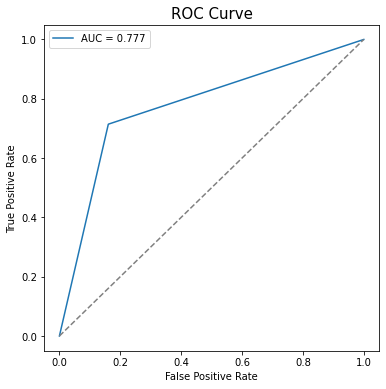

In [97]:
fpr, tpr, tr = roc_curve(y_test,y_pred_gbc_tuned)
auc = roc_auc_score(y_test, y_pred_gbc_tuned)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='AUC = %0.3f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='grey')
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('ROC Curve', fontsize=15)
plt.legend()

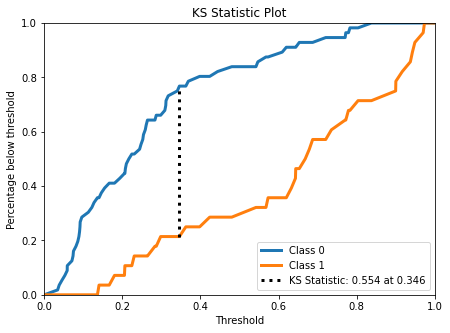

In [98]:
import scikitplot as skplt
y_pred_proba = gbc_tuned.predict_proba(X_test)

skplt.metrics.plot_ks_statistic(y_test, y_pred_proba, figsize=(7,5));


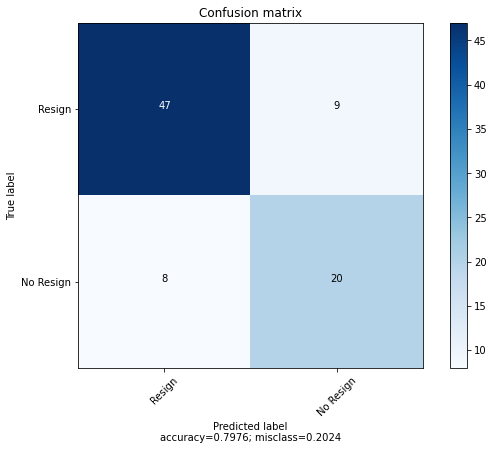

In [99]:
gbc_tuned.fit(X_smote,y_smote)
y_train_pred = gbc_tuned.predict(X_train)
y_test_pred = gbc_tuned.predict(X_test)


cm = confusion_matrix(y_test, y_test_pred)
target_names = ['Resign','No Resign']

plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

In [100]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

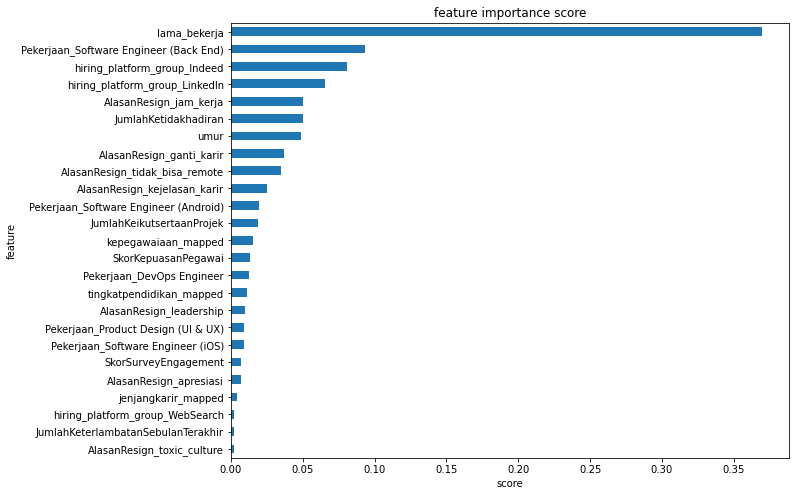

In [101]:
show_feature_importance(gbc_tuned.best_estimator_)

In [102]:
import shap
explainer = shap.Explainer(gbc_tuned.predict, X_smote)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_smote)

Permutation explainer: 281it [00:36,  6.91it/s]                         


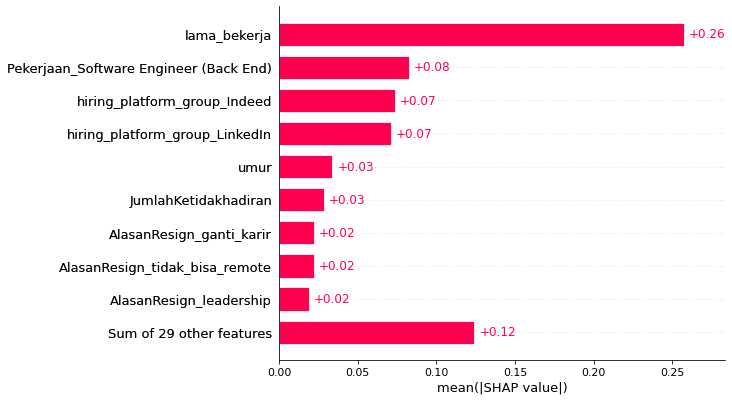

In [103]:
shap.plots.bar(shap_values)

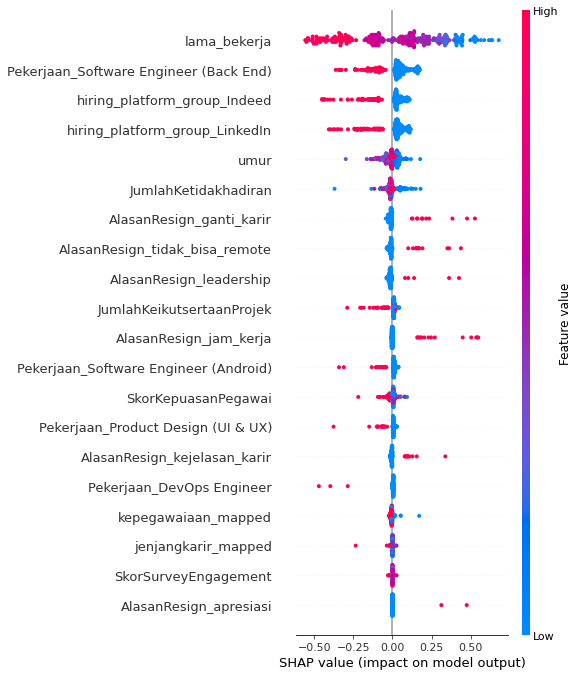

In [104]:
shap.summary_plot(shap_values)

### Visualization Based on Feature Importance

In [105]:
df_vis = df_pre.copy()

In [106]:
df_vis_gb1 = df_vis.groupby(['lama_bekerja','is_resign']).agg(total_karyawan = ('umur','count')).reset_index()

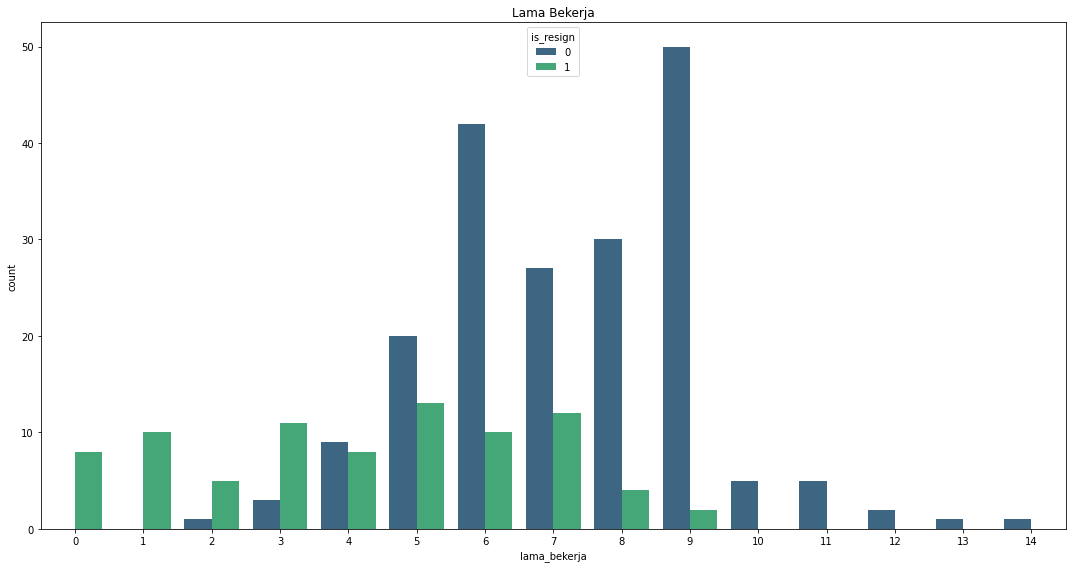

In [107]:
plt.figure(figsize=(15,8))
sns.countplot(x=df_vis['lama_bekerja'], palette='viridis', hue=df_vis['is_resign'])
plt.title('Lama Bekerja')
plt.tight_layout()

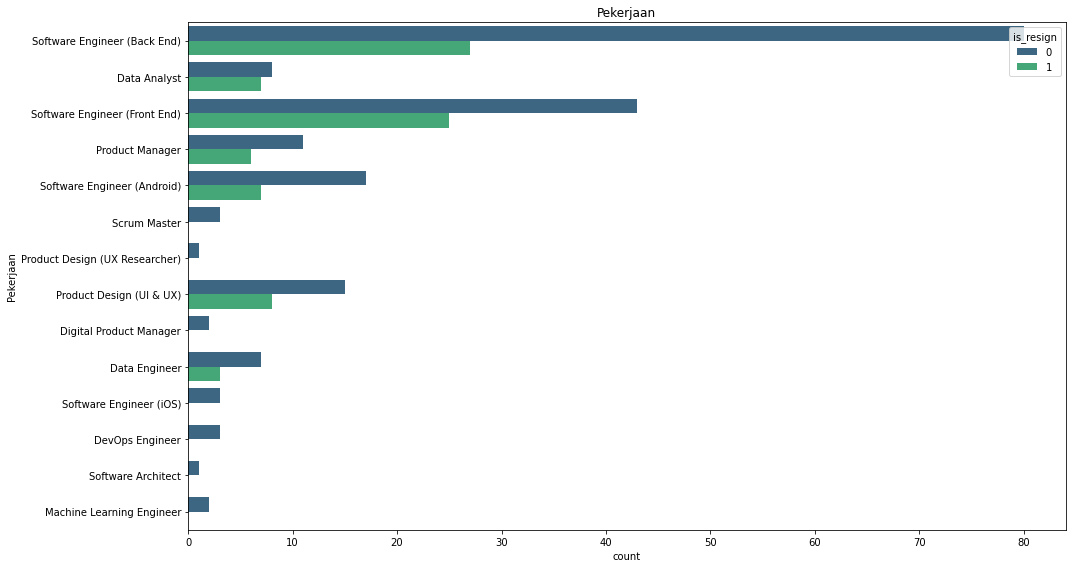

In [108]:
plt.figure(figsize=(15,8))
sns.countplot(y=df_vis['Pekerjaan'], palette='viridis', hue=df_vis['is_resign'])
plt.title('Pekerjaan')
plt.tight_layout()

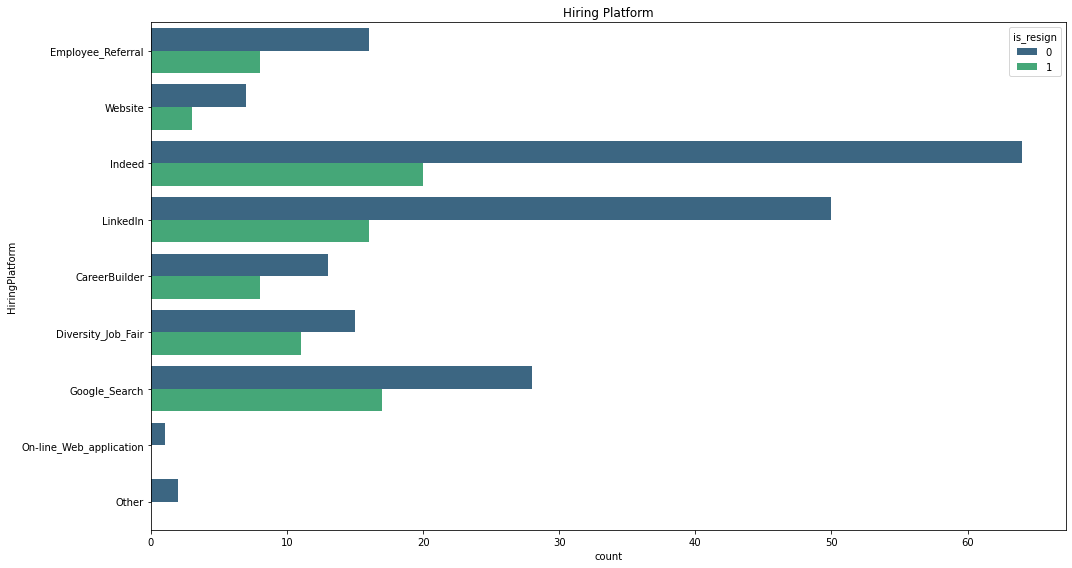

In [109]:
plt.figure(figsize=(15,8))
sns.countplot(y=df_vis['HiringPlatform'], palette='viridis', hue=df_vis['is_resign'])
plt.title('Hiring Platform')
plt.tight_layout()

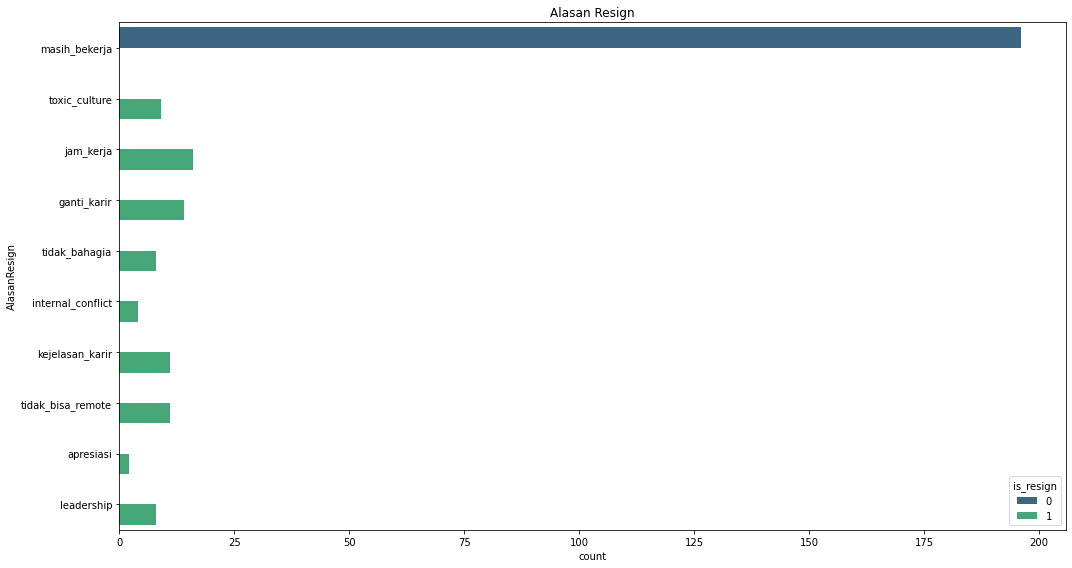

In [110]:
plt.figure(figsize=(15,8))
sns.countplot(y=df_vis['AlasanResign'], palette='viridis', hue=df_vis['is_resign'])
plt.title('Alasan Resign')
plt.tight_layout()

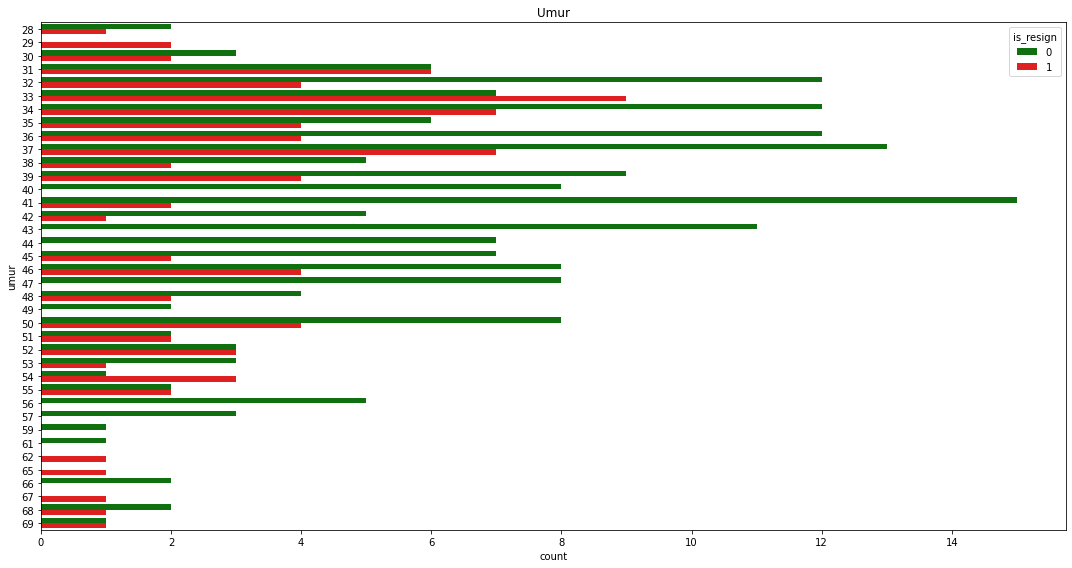

In [111]:
plt.figure(figsize=(15,8))
sns.countplot(y=df_vis['umur'], palette=['green','red'], hue=df_vis['is_resign'])
plt.title('Umur')
plt.tight_layout()

## Summary

1. Fitur `lama_bekerja` menjadi fitur yang paling penting dalam menentukan apakah karyawan akan resign (is_resign = 1) atau tidak (is_resign = 0). Hal yang menarik bahwa karyawan yang bekerja lebih dari 10 Tahun cenderung tidak akan resign sementara karyawan dengan lama kerja < 5 Tahun cenderung untuk resign. 
2. Fitur `Pekerjaan` SoftwareEngineer (Back End) menjadi fitur penting selanjutnya yang menentukan karyawan akan resign atau tidak.Terlihat karyawan yang berkeja sebagai SoftwareEngineer (Back End) minim untuk resign.
3. Fitur `HiringPlatform` menjadi fitur penting selanjutnya khususnya platform indeed dan linkedin.Ada kencendrungan karyawan yang dihire lewat plaform tersebut cukup minim untuk resign.
4. Fitur `umur` menjadi fitur penting ke 5 yang menentukan karyawan akan resign atau tidak.

Melihat sebelumnya alasan resign yang cukup tinggi yaitu jam kerja dan jenjang karir,perusahaan perlu berbenah kembali dengan jam kerja bagi pegawai baru <br>
karena sepertinya mereka belum bisa beradaptasi jika harus memiliki jam kerja yang sama seperti kondisi saat ini.
<br> Jenjang karir juga perlu dibenahi seperti adanya pelatihan untuk kenaikan jabatan dan adanya peningkatan gaji bagi karyawan yang telah lama bekerja di perusahaan